# Introduction 

Everyone loves movies irrespective of age, gender, race, color, or geographical location. We all in a way are connected to each other via this amazing medium.Our unique choices and combinations are in terms of movie preferences. 

Some people like genre-specific movies be it a thriller, romance, or sci-fi, while others focus on lead actors and directors. When we take all that into account, it’s astoundingly difficult to generalize a movie and say that everyone would like it. But with all that said, it is still seen that similar movies are liked by a specific part of the society.

So here’s where the data scientists come into play and extract the juice out of all the behavioral patterns of not only the audience but also from the movies themselves. So without further ado let’s jump right into the basics of a recommendation system.

# Recommendation System

Recommendation System is a process to filter and predict the 'Rating' a user would give to an item.it is used in various areas such as  video and music services, product recommenders for online stores, or content recommenders for social media platforms and open web content recommenders.

There are two methods of Filtration strategies:

---> collaborative filtering

---> content-based filtering

# collaborative filtering

Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. The system generates recommendations using only information about rating profiles for different users or items

A key advantage of the collaborative filtering is that it does not rely on machine analyzable content and therefore it is capable of accurately recommending complex items such as movies without requiring an "understanding" of the item itself. Many algorithms have been used in measuring user similarity or item similarity in the recommendation systems.

example:KNearestNeighbors.
 

# Coding-Item based Collaborative Filtering

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\welcome\anaconda3\envs\notebook\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\welcome\anaconda3\envs\notebook\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\welcome\anaconda3\envs\notebook\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
movies=pd.read_csv('C:/Users/welcome/Excel Documents/Capstone/movies - movies.csv')

In [3]:
ratings=pd.read_csv('C:/Users/welcome/Excel Documents/Capstone/ratings - ratings.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


movieId - to recommend a movie, a list of similiar movieId to get a title for each movie from the dataset

title - title of the movie

genres - category of the movie

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


userId - unique for each user

movieId - id for movie title from the dataset

rating - best movies rated by the user to predict the top 10 movies

In [6]:
data=pd.merge(ratings,movies,on='movieId',how='left')

In [7]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


using left outer join, the common column will be movieId.

In [8]:
data['genres']=data['genres'].str.split('|')

In [9]:
data['genres']=data['genres'].replace('|',',')

<AxesSubplot:>

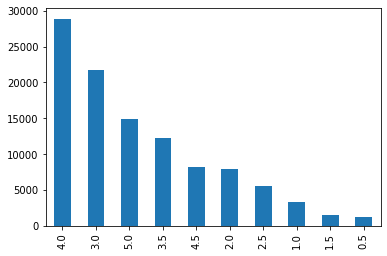

In [10]:
data['rating'].value_counts().plot.bar()

In [11]:
pd.crosstab(data['userId'],data['rating'])

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
userId,,,,,,,,,,
1,6,0,6,1,4,12,21,26,25,12
2,0,0,0,2,0,5,0,16,0,6
3,0,0,0,0,0,32,0,24,0,17
4,0,1,0,4,0,14,0,60,0,45
5,7,3,3,3,4,5,16,14,5,8
...,...,...,...,...,...,...,...,...,...,...
664,0,3,1,3,2,8,4,15,5,33
665,2,3,6,18,28,47,64,44,12,3
666,0,35,0,32,0,43,0,51,0,64


In [12]:
final_dataset=pd.pivot_table(data=ratings,index='movieId',columns='userId',values='rating')

In [13]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,4.0,5.0,3.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.5


In [14]:
final_dataset.fillna(0,inplace=True)

In [15]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


based on userId and movieId, it is easier to understand and work with a new dataframe where each column would represent each unique userId and each row represents each unique movieId.

if the userId 2 has rated the movieId 1 as 5.0, userId 2 has watched that movie. whereas userId 663 hasn't rated the movieId 3,then he didn't watched the movie.therefore,in order to ignore 'NaN', impute NaN with 0 to make things understandable for the algorithm and also making the data more eye-soothing.

# removing noise from the data

movies that were rated by a small number of users because it’s not credible enough. Similarly, users who have rated only a handful of movies should also not be taken into account.

So with all that taken into account and some trial and error experimentations,  we will reduce the noise by adding some filters for the final dataset.

To qualify a movie, a minimum of 10 users should have voted a movie.
To qualify a user, a minimum of 50 movies should have voted by the user.

In [16]:
no_user_rated=pd.pivot_table(data=data,index='movieId',values='rating',aggfunc='count')

In [17]:
no_movies_rated=pd.pivot_table(data=data,index='userId',values='rating',aggfunc='count')

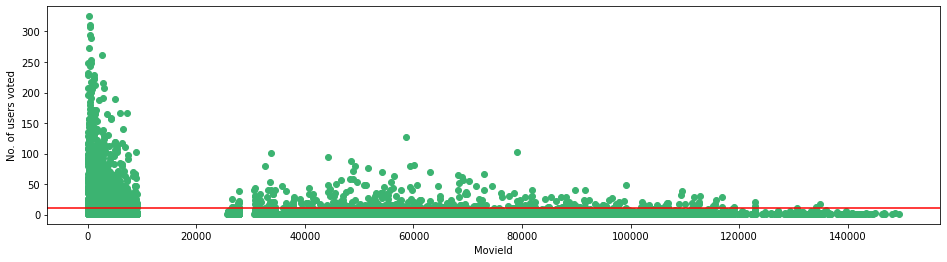

In [18]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_rated.index,no_user_rated,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

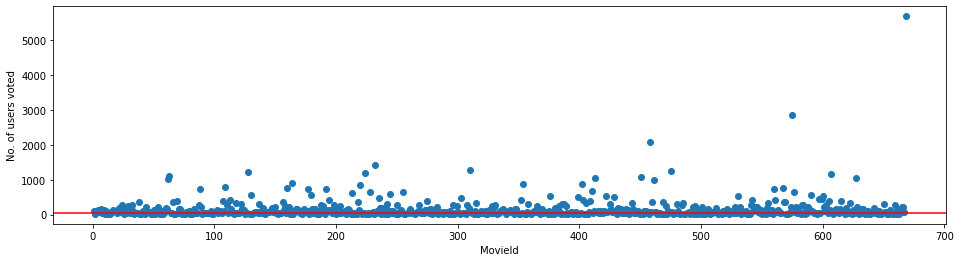

In [19]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_movies_rated.index,no_movies_rated)
plt.axhline(y=50,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [20]:
# to qualify a movie,minimum of 10 users should be rated

a=no_user_rated[no_user_rated>10].index

In [21]:
final_dataset=final_dataset.loc[a,:]

In [22]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [23]:
# qualify a movie,minimum of 50 movies should be rated by a user

b=no_movies_rated[no_movies_rated>50].index

In [24]:
final_dataset=final_dataset.loc[:,b]

In [25]:
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


#### csr_matrix

sparse matrix or sparse array is a matrix in which most of the elements are zero.

if most of the elements are nonzero, then the matrix is considered dense.The number of zero-valued elements divided by the total number of elements (e.g., m × n for an m × n matrix) is sometimes referred to as the sparsity of the matrix.


In [26]:
from scipy.sparse import csr_matrix

In [27]:
csr_data=csr_matrix(final_dataset.values)

In [28]:
final_dataset.reset_index(inplace=True)

# Making the Recommendation Model

To create a model, KNearestNeighbors is used to compute the similiarity with cosine distance metric which is more preferred than preason coefficient.

In [29]:
from sklearn.neighbors import NearestNeighbors

In [30]:
knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20)

In [31]:
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

if the movie name input is in the database ,if it is in the recommendation system to find similar movies,sort them based on their similarity distance and output only the top 10 movies with their distances from the input movie.

In [32]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [33]:
get_movie_recommendation('Toy Story')

,Title,Distance
1,Jurassic Park (1993),0.443548
2,Toy Story 2 (1999),0.442477
3,Willy Wonka & the Chocolate Factory (1971),0.440334
4,Mission: Impossible (1996),0.439901
5,Star Wars: Episode V - The Empire Strikes Back...,0.433630
6,Back to the Future (1985),0.422687
7,Independence Day (a.k.a. ID4) (1996),0.421632
8,Raiders of the Lost Ark (Indiana Jones and the...,0.413943
9,Star Wars: Episode IV - A New Hope (1977),0.371223
10,Star Wars: Episode VI - Return of the Jedi (1983),0.370163


In [34]:
get_movie_recommendation('Memento')

,Title,Distance
1,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",0.455670
2,Minority Report (2002),0.448508
3,Kill Bill: Vol. 1 (2003),0.447533
4,Shrek (2001),0.445369
5,Ocean's Eleven (2001),0.442993
6,"Lord of the Rings: The Two Towers, The (2002)",0.441848
7,"Matrix, The (1999)",0.428574
8,American Beauty (1999),0.406792
9,"Lord of the Rings: The Fellowship of the Ring,...",0.391322
10,Fight Club (1999),0.371181


In [35]:
get_movie_recommendation('Indiana Jones')

,Title,Distance
1,"Princess Bride, The (1987)",0.353127
2,Alien (1979),0.352235
3,Aliens (1986),0.346268
4,Star Wars: Episode VI - Return of the Jedi (1983),0.308050
5,Star Wars: Episode IV - A New Hope (1977),0.307371
6,Back to the Future (1985),0.305920
7,Die Hard (1988),0.304762
8,"Terminator, The (1984)",0.292446
9,Star Wars: Episode V - The Empire Strikes Back...,0.229621
10,Indiana Jones and the Last Crusade (1989),0.177639


In [36]:
get_movie_recommendation('Harry Potter')

,Title,Distance
1,Memento (2000),0.547901
2,X-Men (2000),0.546155
3,"Monsters, Inc. (2001)",0.530922
4,Ocean's Eleven (2001),0.513965
5,"Lord of the Rings: The Fellowship of the Ring,...",0.502386
6,Shrek (2001),0.502213
7,Spider-Man (2002),0.481032
8,Harry Potter and the Goblet of Fire (2005),0.473564
9,Harry Potter and the Prisoner of Azkaban (2004),0.367667
10,Harry Potter and the Chamber of Secrets (2002),0.332917


# Content Based Recommendation System

The Content-Based Recommender relies on the similarity of the items being recommended. The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used here. We will build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre.

We do not have a quantitative metric to judge the machine’s performance so this will have to be done qualitatively. In order to do so, we will use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator. This can be understood as Pre-processing the data. 

#### Cosine Similiarity

This metric is used for computing the similiarity textual data.In this recommendation system,convert the textual data in the form of vectors and check for cosine angle between these two vectors, if the angle between the two vectors is 0.It means they are similar or else they are not. Most used similarity measures when we talk about the similarity between any textual content.

#### TFIDF vectorizer

TFIDF is used for evaluating how relevant a word is to a document in a collection of documents statistically. this is done by
how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.


TF=(Number of times term appears in a document) / (Total number of terms in the document)

IDF=log_e(Total number of documents / Number of documents with term in it)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [39]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [40]:
matrix=tf.fit_transform(movies['genres'])

In [41]:
cosine_similarities = cosine_similarity(matrix,matrix)

In [42]:
movie_title=data['title']

In [43]:
movie_title.head()

0                                Casino (1995)
1                                Powder (1995)
2    Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3                  Seven (a.k.a. Se7en) (1995)
4                   Usual Suspects, The (1995)
Name: title, dtype: object

In [44]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
indices = pd.Series(movies.index,index=movies['title'])

In [46]:
indices.head()

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
dtype: int64

In [47]:
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return movie_title.iloc[movie_indices]  

In [48]:
genre_recommendations('2001: A Space Odyssey (1968)').head(10)

745                                      Crow, The (1994)
827                              Dog Day Afternoon (1975)
1064                                Temptress, The (1926)
2756          Seven Samurai (Shichinin no samurai) (1954)
3424                                       Jumanji (1995)
5383                             Dolores Claiborne (1995)
5701                                        Ransom (1996)
9843                                 About Schmidt (2002)
7338    National Lampoon's Van Wilder: The Rise of Taj...
1369        Lord of the Rings: The Two Towers, The (2002)
Name: title, dtype: object

In [49]:
genre_recommendations('Casino (1995)').head(10)

29                                          Fargo (1996)
35                                 Godfather, The (1972)
89     Lord of the Rings: The Fellowship of the Ring,...
105                              Land of the Dead (2005)
215    Shanghai Triad (Yao a yao yao dao waipo qiao) ...
217                                   Taxi Driver (1976)
237                                    Casablanca (1942)
252                              Crying Game, The (1992)
255                      Sex, Lies, and Videotape (1989)
279                                    Birds, The (1963)
Name: title, dtype: object

In [50]:
genre_recommendations('Casino Royale (2006)').head(10)

87                                 Shrek (2001)
382     Importance of Being Earnest, The (2002)
439                         Finding Nemo (2003)
490            Silence of the Lambs, The (1991)
619                 Terminator Salvation (2009)
680                        Jerry Maguire (1996)
802                               Batman (1989)
1111                      Lion King, The (1994)
1213                               Twins (1988)
1249                      V for Vendetta (2006)
Name: title, dtype: object

In [51]:
genre_recommendations('Toy Story (1995)').head(10)

1815                          Analyze That (2002)
2496                   Room with a View, A (1986)
2967                         All About Eve (1950)
3166                       Rosemary's Baby (1968)
3811                    Planet of the Apes (2001)
6617                         Fugitive, The (1993)
6997                             Slap Shot (1977)
7382                         Evan Almighty (2007)
7987                              Trekkies (1997)
9215    Indiana Jones and the Last Crusade (1989)
Name: title, dtype: object

In [52]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [53]:
new_ratings=ratings.drop(columns='timestamp')

In [54]:
new_ratings['rating']=new_ratings['rating'].astype(int)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_data,test_data=train_test_split(new_ratings,test_size=0.2)

In [57]:
train_data_matrix=train_data.to_numpy()

In [58]:
test_data_matrix=test_data.to_numpy()

In [59]:
train_data_matrix.shape,test_data_matrix.shape

((84271, 3), (21068, 3))

There are 2 main types of memory-based collaborative filtering algorithms:
​
#### User-User Collaborative Filtering:
Here we find look alike users based on similarity and recommend movies which first user’s look-alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.
​
#### Item-Item Collaborative Filtering: 
It is quite similar to previous algorithm, but instead of finding user’s look-alike, we try finding movie’s look-alike. Once we have movie’s look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users. And with fixed number of movies, movie-movie look alike matrix is fixed over time.

In [60]:
from sklearn.metrics.pairwise import pairwise_distances

In [61]:
x=pairwise_distances(train_data_matrix.T,metric='correlation')

In [62]:
y=pairwise_distances(test_data_matrix.T,metric='correlation')

In [63]:
item_correlation=1-x
item_correlation[np.isnan(item_correlation)]=0
print(item_correlation[:4,:4])

[[ 1.          0.08636164 -0.04274022]
 [ 0.08636164  1.         -0.05939763]
 [-0.04274022 -0.05939763  1.        ]]


In [64]:
def predict(ratings,similiarity,type='user'):
    if type=='user':
        mean_user_rating=ratings.mean(axis=1)
        ratings_diff=ratings-mean_user_rating[:,np.newaxis]
        pred = mean_user_rating[:, np.newaxis] + similiarity.dot(ratings_diff) / np.array([np.abs(similiarity).sum(axis=1)]).T
    elif type=='item':
        pred = ratings.dot(similiarity) / np.array([np.abs(similiarity).sum(axis=1)])
    return pred

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
def rmse(actual,pred):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    rmse=np.sqrt(mean_squared_error(actual,pred))
    return rmse

In [67]:
item_prediction=predict(train_data_matrix,item_correlation,type='item')

In [68]:
item_prediction

array([[ 713.51524887, 1803.52227323, -130.21951339],
       [ 542.36642225,  563.12988756,  -50.30010626],
       [ 859.28844929, 4941.44568711, -318.96526723],
       ...,
       [ 660.14692977, 2619.2933295 , -174.84228423],
       [ 417.15288598, 1230.76613345,  -84.39351689],
       [ 921.67990333, 5754.07449195, -367.89851977]])

In [69]:
print('Item-based CF RMSE: ',str(rmse(train_data_matrix,item_prediction)))

Item-based CF RMSE:  2677.043479416915


In [70]:
print('Item-based CF RMSE: ',str(rmse(test_data_matrix,item_prediction)))

Item-based CF RMSE:  20129.812347589865


RMSE of training of model is a metric which measure how much the signal and the noise is explained by the model. I noticed that my RMSE is quite big. I suppose I might have overfitted the training data.Overall, Memory-based Collaborative Filtering is easy to implement and produce reasonable prediction quality. 

However, there are some drawback of this approach:

#### It doesn't address the well-known cold-start problem, that is when new user or new item enters the system.
#### It can't deal with sparse data, meaning it's hard to find users that have rated the same items.
#### It suffers when new users or items that don't have any ratings enter the system.
#### It tends to recommend popular items.

##  4. Model-based collaborative filtering using Matrix factorization and Dimensionality reduction:

In [71]:
rating_2=pd.pivot_table(data=ratings,index='userId',columns='movieId',values='rating').fillna(0)

In [72]:
rating_2.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


let's count the number of unique users and movies.

In [73]:
user_ratings_mean=np.mean(rating_2.to_numpy(),axis=1)

In [74]:
ratings_demanded=(rating_2.to_numpy())-(user_ratings_mean.reshape(-1,1))

In [75]:
n_users=ratings['userId'].shape[0]
n_movies=ratings['movieId'].shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 105339 | Number of movies = 105339


Now we want the format of my ratings matrix to be one row per user and one column per movie. To do so, we will pivot ratings to get that and call the new variable Ratings2 (with a capital *R).

In [76]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print ('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 100.0%


Model-based Collaborative Filtering is based on matrix factorization (MF) which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF:

The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items.

When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector.

You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

### Setting Up SVD

Scipy and Numpy both have functions to do the singular value decomposition. I'm going to use the Scipy function svds because it let's me choose how many latent factors I want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [77]:
from scipy.sparse.linalg import svds

In [78]:
u,sigma,vt=svds(ratings_demanded,k=50)

In [79]:
u

array([[-8.99150529e-03,  2.06688001e-02, -1.82787409e-02, ...,
         1.33980545e-02, -8.91701031e-03, -4.34594868e-02],
       [ 7.02211897e-03,  8.52369117e-03, -2.06093463e-03, ...,
         1.35483022e-02,  1.10831323e-02, -7.28917571e-03],
       [ 7.60339840e-03, -2.16570667e-02, -1.48513521e-02, ...,
         5.91162090e-02,  3.32692847e-02, -1.98287879e-02],
       ...,
       [-1.59964621e-02, -1.52558874e-03,  2.98470628e-02, ...,
        -4.11685012e-02,  2.10758551e-02, -3.78406551e-02],
       [-6.06185423e-03, -3.05389137e-03,  6.45705004e-03, ...,
         1.88700152e-02, -4.57420244e-03, -2.51302781e-02],
       [-2.00714910e-04, -1.65049393e-02, -1.31357315e-02, ...,
        -3.65966498e-01,  3.21726441e-02, -9.29570839e-02]])

In [80]:
sigma

array([ 67.75583954,  68.10174582,  68.41554944,  69.25742958,
        69.71428633,  70.03822422,  70.63880278,  71.3519959 ,
        72.01046605,  72.49217043,  72.71366588,  73.71441659,
        74.03995873,  75.07874467,  75.63194166,  76.5179679 ,
        78.3284683 ,  79.09658441,  80.14436134,  80.34678755,
        81.33475947,  81.69045271,  83.31280447,  84.07340268,
        85.46896657,  87.97453293,  88.13453246,  89.03316544,
        89.69145949,  92.26863942,  93.32591813,  94.38335623,
        95.68363396,  97.43909002, 100.31028998, 103.8285294 ,
       106.91484618, 110.24997517, 113.42325271, 117.97764847,
       120.30374869, 122.89039344, 130.06109202, 134.86435077,
       143.52740449, 155.79132806, 163.28017959, 188.46765204,
       229.09814764, 480.87123202])

In [81]:
vt

array([[-1.02328482e-02,  4.48934821e-03,  5.01349447e-03, ...,
        -1.01312524e-03,  2.52574324e-03, -1.24258501e-03],
       [-9.77255054e-03,  2.85802295e-03,  2.42247054e-03, ...,
        -1.75274343e-03,  5.70463009e-03, -2.41625509e-03],
       [ 3.72650563e-02, -4.76742953e-03, -8.06559214e-03, ...,
        -7.77121997e-04,  3.84524967e-03, -1.10388500e-03],
       ...,
       [ 3.87145998e-02,  3.75903769e-02,  2.60274369e-02, ...,
         3.56085998e-03, -9.07085798e-03,  3.30080119e-03],
       [ 1.81274869e-02, -8.06214340e-04,  1.35117605e-02, ...,
         5.58976785e-05,  2.94962850e-04, -1.20500077e-04],
       [-8.03164042e-02, -3.17056020e-02, -9.42407409e-03, ...,
         4.40677960e-03,  2.13542969e-03,  4.26939746e-03]])

As I'm going to leverage matrix multiplication to get predictions, I'll convert the $\Sigma$ (now are values) to the diagonal matrix form.

In [82]:
sigma=np.diag(sigma)

### Making Predictions from the Decomposed Matrices

We now have everything I need to make movie ratings predictions for every user. We can do it all at once by following the math and matrix multiply $U$, $\Sigma$, and $V^{T}$ back to get the rank $k=50$ approximation of $A$.

But first, We need to add the user means back to get the actual star ratings prediction.

In [83]:
all_user_predicted_ratings=np.dot(np.dot(u,sigma),vt)+user_ratings_mean.reshape(-1,1)

With the predictions matrix for every user, We can build a function to recommend movies for any user. We return the list of movies the user has already rated, for the sake of comparison.

In [84]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = rating_2.columns)

In [85]:
preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
0,2.340908,0.116324,0.182888,-0.036764,0.063752,1.539780,0.101114,-0.025708,0.194963,0.992245,...,-0.014009,-0.023786,-0.005130,-0.010363,-0.048034,-0.036938,-0.020261,-0.019312,0.007349,-0.028260
1,3.151773,0.206667,1.666566,-0.077891,1.485149,1.730959,1.173952,0.023590,0.766577,-0.211013,...,-0.004981,-0.011264,-0.008696,-0.008589,-0.010318,0.017270,0.008911,-0.010372,-0.046182,-0.012156
2,0.991437,0.829049,0.553093,0.183691,0.576599,0.331009,0.773242,0.034812,0.014922,1.706305,...,0.002468,-0.001017,0.010078,-0.004328,0.012828,0.018177,0.008082,-0.002121,-0.041568,0.000087
3,0.619139,-0.217151,-0.238869,0.127655,-0.099769,0.117654,-0.102186,-0.058419,-0.008662,0.010188,...,0.014678,0.037013,-0.033948,0.015854,0.066009,-0.011781,-0.011998,0.029960,-0.044401,0.044066
4,1.636123,0.410191,0.087905,-0.022208,0.083438,-0.128785,-0.018924,0.016518,0.031642,0.311503,...,0.026540,-0.006282,0.001862,-0.000280,0.020807,0.030318,0.021845,-0.004282,0.008430,-0.008283


Now we write a function to return the movies with the highest predicted rating that the specified user hasn't already rated. Though we didn't use any explicit movie content features (such as genre or title), we will merge in that information to get a more complete picture of the recommendations.

In [86]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    user_row_number = userID - 1 
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) 
    
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

Let's try to recommend 20 movies for user with ID 5.

In [87]:
already_rated, predictions = recommend_movies(preds, 5, movies, ratings, 20)

User 5 has already rated 68 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [88]:
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
67,5,81847,5.0,1303500307,Tangled (2010),Animation|Children|Comedy|Fantasy|Musical|Roma...
62,5,68793,5.0,1303500362,Night at the Museum: Battle of the Smithsonian...,Action|Comedy|IMAX
43,5,5380,5.0,1303500762,"Importance of Being Earnest, The (2002)",Comedy|Drama|Romance
27,5,2657,5.0,1303499758,"Rocky Horror Picture Show, The (1975)",Comedy|Horror|Musical|Sci-Fi
60,5,63859,5.0,1303499888,Bolt (2008),Action|Adventure|Animation|Children|Comedy
54,5,46972,5.0,1303500388,Night at the Museum (2006),Action|Comedy|Fantasy|IMAX
63,5,68954,5.0,1303499879,Up (2009),Adventure|Animation|Children|Drama
64,5,71264,5.0,1303500727,Cloudy with a Chance of Meatballs (2009),Animation|Children|Fantasy|IMAX
61,5,67408,4.5,1303500804,Monsters vs. Aliens (2009),Animation|Sci-Fi|IMAX
57,5,56152,4.5,1303499798,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...


In [89]:
predictions.head(20)

,movieId,title,genres
2461,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
3770,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
1843,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy
254,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
308,356,Forrest Gump (1994),Comedy|Drama|Romance|War
909,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
2928,3751,Chicken Run (2000),Animation|Children|Comedy
612,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
3989,5218,Ice Age (2002),Adventure|Animation|Children|Comedy
856,1073,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical


These look like pretty good recommendations. It's good to see that, although we didn't actually use the genre of the movie as a feature, the truncated matrix factorization features "picked up" on the underlying tastes and preferences of the user. We've recommended some comedy, drama, and romance movies - all of which were genres of some of this user's top rated movies.

### Model Evaluation

Instead of doing manually like the last time, I will use the Surprise library that provided various ready-to-use powerful prediction algorithms including (SVD) to evaluate its RMSE (Root Mean Squared Error) on the MovieLens dataset. It is a Python scikit building and analyzing recommender systems.

In [90]:
from surprise import Dataset,Reader,SVD

In [91]:
reader=Reader()

In [92]:
data=Dataset.load_from_df(new_ratings,reader)

In [93]:
svd=SVD()

In [94]:
from surprise.model_selection import cross_validate

In [95]:
cross_validate(svd,data,measures=['RMSE','MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8996  0.9017  0.9102  0.9123  0.9027  0.9053  0.0050  
MAE (testset)     0.6980  0.6986  0.7049  0.7047  0.6977  0.7008  0.0033  
Fit time          7.15    7.96    8.17    6.80    6.81    7.38    0.58    
Test time         0.23    0.40    0.21    0.16    0.29    0.26    0.08    


{'test_rmse': array([0.89962319, 0.90171088, 0.91020732, 0.91234874, 0.90269269]),
 'test_mae': array([0.69795418, 0.69859247, 0.70488351, 0.70472412, 0.69767182]),
 'fit_time': (7.14961314201355,
  7.961318016052246,
  8.172366857528687,
  6.79537034034729,
  6.811302185058594),
 'test_time': (0.2263953685760498,
  0.39594054222106934,
  0.20795750617980957,
  0.1620771884918213,
  0.2862362861633301)}

We get a mean Root Mean Square Error of 0.8690 which is pretty good. Let's now train on the dataset and arrive at predictions.

In [96]:
trainset=data.build_full_trainset()

In [97]:
svd.fit(trainset)

Now let's use SVD to predict the rating that User with ID 5 will give to a random movie (let's say with Movie ID 5000).

In [98]:
svd.predict(5,5000)

Prediction(uid=5, iid=5000, r_ui=None, est=2.6762203770476507, details={'was_impossible': False})

### Conclusion

In this notebook, we attempted to build a model-based Collaborative Filtering movie recommendation sytem based on latent features from a low rank matrix factorization method called SVD. As it captures the underlying features driving the raw data, it can scale significantly better to massive datasets as well as make better recommendations based on user's tastes.

However, we still likely lose some meaningful signals by using a low-rank approximation. Specifically, there's an interpretability problem as a singular vector specifies a linear combination of all input columns or rows. There's also a lack of sparsity when the singular vectors are quite dense. Thus, SVD approach is limited to linear projections.